# GAN Debugging Notebook

This notebook is provided to help you debug your code. We provide you with small discriminator and generator networks that you can train on the MNIST dataset. This small GAN can be trained quickly on MNIST and will help you verify that your loss functions and training code is correct.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
os.chdir("drive/MyDrive/assignment4_materials")

In [3]:
#

import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [24]:
from gan.train import train
from gan.utils import sample_noise, show_images, deprocess_img, preprocess_img
from gan.losses import discriminator_loss, generator_loss, ls_discriminator_loss, ls_generator_loss

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## MNIST Dataset


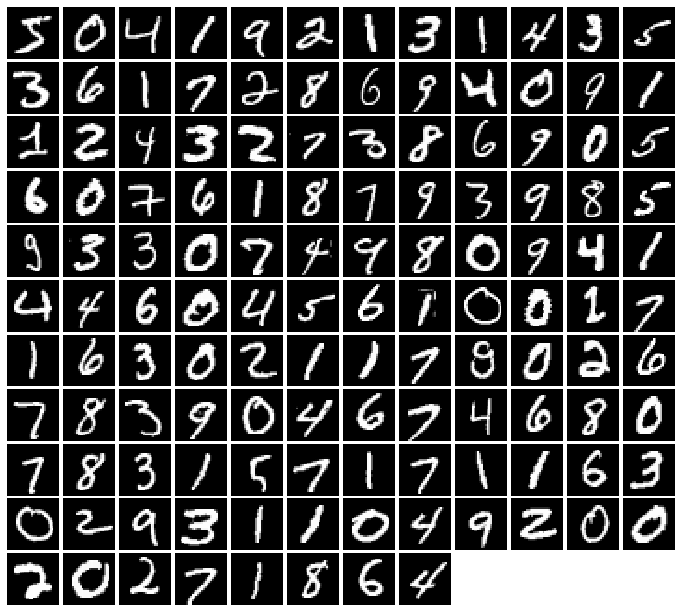

In [7]:
NOISE_DIM = 100
batch_size = 128

mnist = datasets.MNIST('./MNIST_data', train=True, download=True,
                           transform=transforms.ToTensor())
loader_train = DataLoader(mnist, batch_size=batch_size, drop_last=True)


imgs = loader_train.__iter__().next()[0].view(batch_size, 784).numpy().squeeze()
show_images(imgs)

# Discriminator and Generator


In [8]:
class Flatten(nn.Module):
    def forward(self, x):
        print(x.size())
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image


In [9]:
def discriminator():
    """
    Initialize and return a simple discriminator model.
    """
    model = torch.nn.Sequential( Flatten(),
                                torch.nn.Linear(784, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 1)
    )
    return model

In [10]:
def generator(noise_dim=NOISE_DIM):
    """
    Initialize and return a simple generator model.
    """
    
    model = nn.Sequential(
        torch.nn.Linear(noise_dim, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 784),
        torch.nn.Tanh()
    )

    return model

Test to make sure the number of parameters in the generator is correct:

# Train

The simple model provided will train on MNIST in only a few minutes. You should expect results that resemble the following if your loss function and training loop implementations are correct:

<img src="files/gan_samples/mnist.jpg" width=500>

EPOCH:  1
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.4236, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.6790, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Iter: 0, D: 1.424, G:0.679


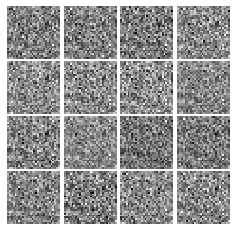


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.0868, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.6282, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.0033, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.4967, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.4430, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.4283, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.6366, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.4747, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3970, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.5954, grad_fn=<BinaryCrossEn

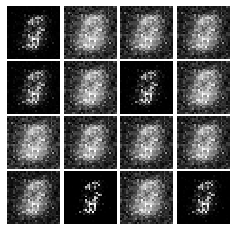


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.1817, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.7930, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.0494, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.0126, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.0221, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9677, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.0127, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.1686, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.0022, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8222, grad_fn=<BinaryCrossEn

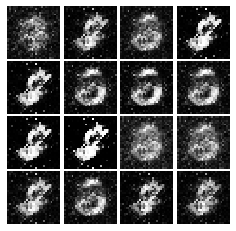


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(0.7118, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.8983, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(0.7833, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(2.0005, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.0148, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(2.1337, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.4630, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.4962, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(2.0711, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(2.2121, grad_fn=<BinaryCrossEn

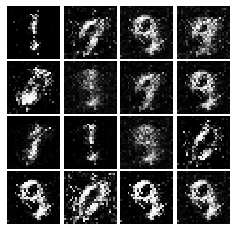


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.1784, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(3.6193, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.9501, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.5684, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.4795, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.0393, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(0.9946, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.6918, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(0.9991, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.3030, grad_fn=<BinaryCrossEn

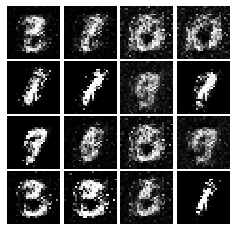


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2466, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.2713, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3811, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.5909, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2916, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.0595, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.4081, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.3397, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3867, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.2678, grad_fn=<BinaryCrossEn

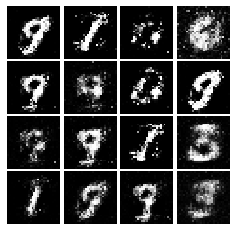


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.1723, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9627, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2214, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.0459, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.1464, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.0913, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.1104, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.0657, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.1404, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.0130, grad_fn=<BinaryCrossEn

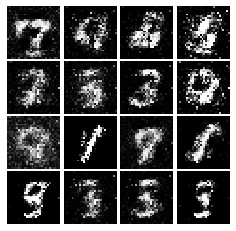


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2572, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9462, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3331, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8594, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3201, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9175, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2767, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9440, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.1790, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9631, grad_fn=<BinaryCrossEn

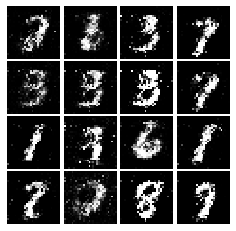


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2216, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9587, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2471, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.0333, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.1611, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.1232, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.1394, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.0187, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2803, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.2304, grad_fn=<BinaryCrossEn

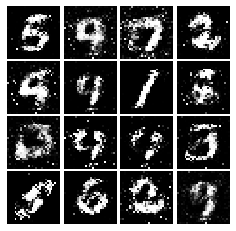


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.7497, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(2.1377, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.7712, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9484, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2495, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.6808, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2725, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.7195, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2627, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.0137, grad_fn=<BinaryCrossEn

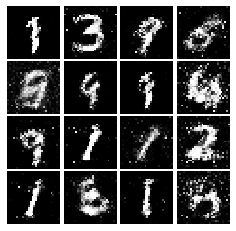


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3023, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9465, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2199, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9735, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2399, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8264, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2910, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.0355, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3567, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9851, grad_fn=<BinaryCrossEn

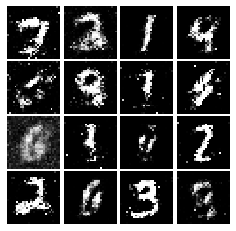


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2449, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8901, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.1997, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8194, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2229, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9480, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.1743, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.0046, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.1963, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9128, grad_fn=<BinaryCrossEn

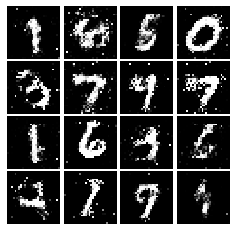


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2467, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8377, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3196, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9660, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2248, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9579, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2399, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8617, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2696, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8442, grad_fn=<BinaryCrossEn

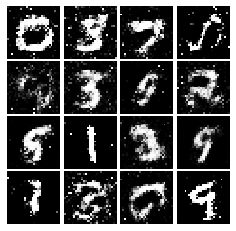


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2766, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8748, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2884, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9632, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2215, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9716, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.4123, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.7810, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3237, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.7720, grad_fn=<BinaryCrossEn

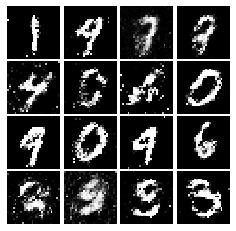


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3410, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9259, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2852, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9455, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.5096, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9676, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3967, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8221, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.4192, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8921, grad_fn=<BinaryCrossEn

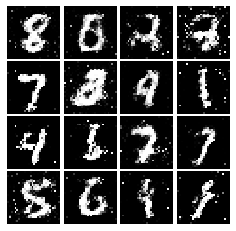


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3002, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9465, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2218, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9139, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3596, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8129, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3111, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8403, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3320, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8292, grad_fn=<BinaryCrossEn

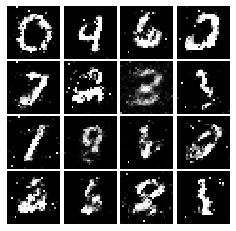


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2382, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8875, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2389, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(1.0253, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3328, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8591, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3355, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8381, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2274, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9347, grad_fn=<BinaryCrossEn

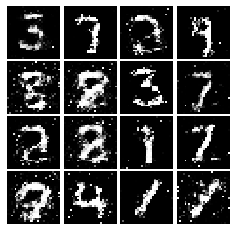


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2384, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8614, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2684, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9694, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2428, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8933, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2421, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8299, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2591, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.9049, grad_fn=<BinaryCrossEn

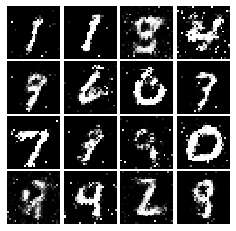


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3795, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.7241, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3750, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.7615, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2595, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8531, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2333, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8866, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2264, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8910, grad_fn=<BinaryCrossEn

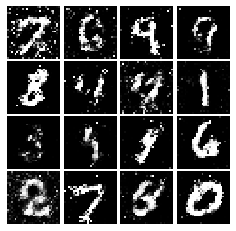


torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2402, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.8464, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2213, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.7898, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2175, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.7671, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.2691, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.7608, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])
D_error tensor(1.3651, grad_fn=<AddBackward0>)
torch.Size([128, 1, 28, 28])
G_error tensor(0.7923, grad_fn=<BinaryCrossEn

In [25]:
# original GAN
D = discriminator().to(device)
G = generator().to(device)

D_optimizer = torch.optim.Adam(D.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D, G, D_optimizer, G_optimizer, discriminator_loss, generator_loss, train_loader=loader_train, num_epochs=10, device=device)

EPOCH:  1
Iter: 0, D: 0.5648, G:0.4763


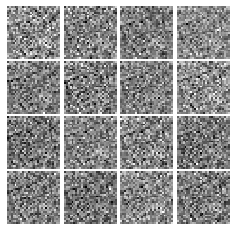


Iter: 250, D: 0.06208, G:0.3882


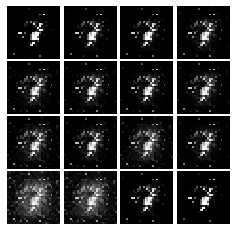


EPOCH:  2
Iter: 500, D: 0.1026, G:0.4005


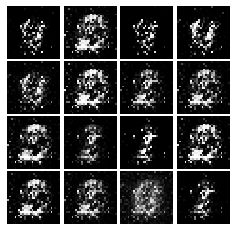


Iter: 750, D: 0.1919, G:0.2506


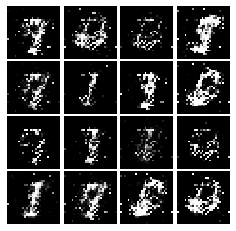


EPOCH:  3
Iter: 1000, D: 0.1044, G:0.3121


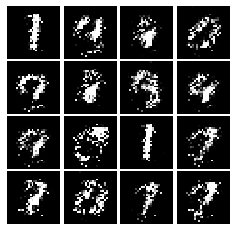


Iter: 1250, D: 0.122, G:0.5038


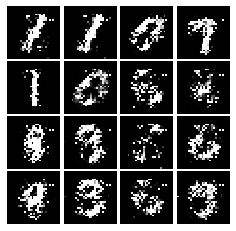


EPOCH:  4
Iter: 1500, D: 0.1551, G:0.2729


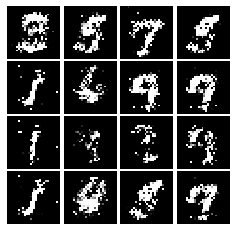


Iter: 1750, D: 0.193, G:0.3633


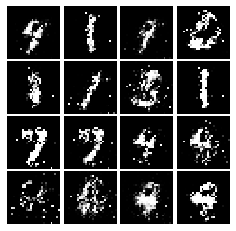


EPOCH:  5
Iter: 2000, D: 0.206, G:0.1993


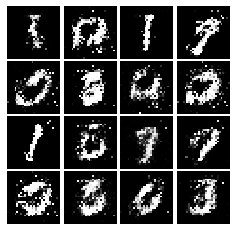


Iter: 2250, D: 0.1967, G:0.2131


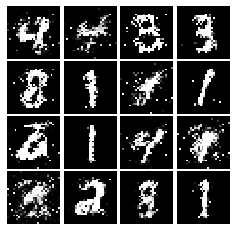


EPOCH:  6
Iter: 2500, D: 0.209, G:0.1889


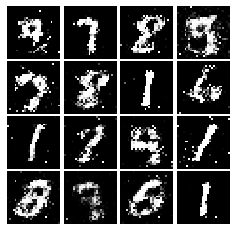


Iter: 2750, D: 0.1981, G:0.1835


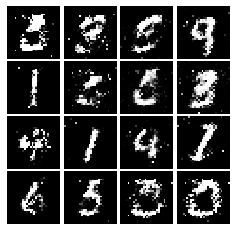


EPOCH:  7
Iter: 3000, D: 0.2133, G:0.1852


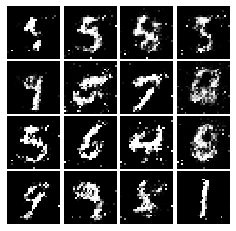


Iter: 3250, D: 0.1962, G:0.1945


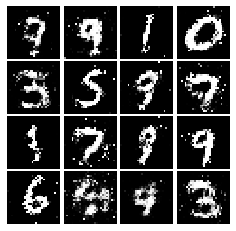


EPOCH:  8
Iter: 3500, D: 0.2278, G:0.1811


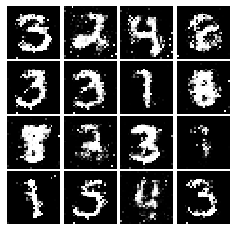


EPOCH:  9
Iter: 3750, D: 0.2003, G:0.2191


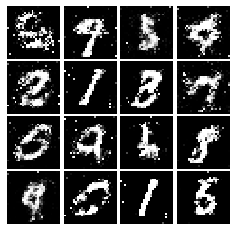


Iter: 4000, D: 0.2238, G:0.1788


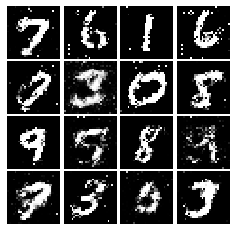


EPOCH:  10
Iter: 4250, D: 0.24, G:0.1769


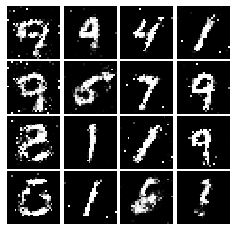


Iter: 4500, D: 0.2281, G:0.1768


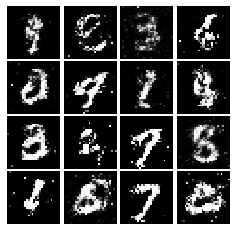

In [ ]:
# LSGAN
D_LS = discriminator().to(device)
G_LS = generator().to(device)

D_LS_optimizer = torch.optim.Adam(D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_LS_optimizer = torch.optim.Adam(G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D_LS, G_LS, D_LS_optimizer, G_LS_optimizer, ls_discriminator_loss, ls_generator_loss, train_loader=loader_train, num_epochs=10, device=device)